# Plug-and-play vs TV minimization for compressive sensing

In this exercise, we implement a simple plug-and-play method and compare it to what we achieved with total variation minimization.

We saw in the lecture, that one way of reconstructing a signal is to impose a prior or a regularizer. One prior that typically works well for images is the TV norm. We provided you with a notebook which implements TV norm minimizaion that you can use for reference.

The goal of this homework is to implement the plug-and-play method (equations 8 and 9 in the lecture notes) for reconstructing a signal from undersampled measurements. The denoising algorithm D is BM3D and $f = ||Ax - y||_2^2$. The code to call BM3D is: bm3d.bm3d(x,sigma), where x is the input image, and sigma is a hyperparameter, that you need to tune.

The task is to fill in the blank cell below and get the plug-and-play method to run. TV minimization works better for this example.

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from PIL import Image
!pip install bm3d
import bm3d            # pip install bm3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 22.8 MB/s 


In [ ]:
img = Image.open("camera_man.png")     #Load the camera man image
x = np.float32(img) / 255.0            #Convert to array

In [ ]:
# Measurement Matrix
a, b = x.shape   # 128 x 128

n = a * b           
m = n // 2       # 2 times acceleration

# Measurement matrix M is Gaussian, mean 0, variance 1
np.random.seed(0)
M = np.random.randn(m, n)
# print('Meaurement matrix shape: {}'.format(M.shape))
# print('M\n{}'.format(M))

In [ ]:
#Forward Model A
def A(x):
    x = x.reshape(a * b) #Flatten into vector
    return M @ x

#Transpose of Forward Model A.T
def AT(y):
     return (M.T @ y).reshape(a, b)

def mse(a, b):
    return ((a - b) ** 2).mean()

In [ ]:
y = A(x)       #Observation
#You might find it useful to have x_0 = A.T(y)
x_i= AT(y)     # initial coarse estimate of the image 

# print('x', x.shape, x)
# print('y', y.shape, y)
# print('x_i', x_i.shape, x_i)

#### Fill in your code here:

In [ ]:
# Use gradient of MSE
def gradient(x, y):
    return 2 * AT(A(x) - y) / y.shape[0]

def plot_graph(x_denoising):
    x_pp = x_denoising   ###Enter your plug-and-play solution here so it can be displayed

    fig = plt.figure(figsize=(30, 30))

    #Coarse Estimate (A.T@y)
    fig.add_subplot(1, 3, 1)
    plt.imshow(AT(y), cmap='gray')
    plt.xlabel('Coarse Estimate', fontsize=20)

    #Plug & Play estimate (BM3D)
    fig.add_subplot(1, 3, 2)
    plt.imshow(x_pp, cmap='gray')
    plt.xlabel('Plug & Play Estimate', fontsize=20)

    #Ground Truth
    fig.add_subplot(1, 3, 3)
    plt.imshow(x, cmap='gray')
    plt.xlabel('Ground Truth', fontsize=20)

    plt.show()

In [ ]:
train_iter = 2500
alpha = 0.1
sigma = 0.01
errors = []
# print('x_0 gradient', gradient(x_i, y))

for i in tqdm(range(train_iter + 1)):
    grad = gradient(x_i, y)
    z_i = x_i - alpha * grad
    x_i = bm3d.bm3d(z_i, sigma_psd=sigma)
    
    err = mse(x, x_i)
    errors.append(err)
    if i % 100 == 0:
        print('epoch = %d,\tmse = %.6f' % (i, err))
        # print(grad)
        # plot_graph(x_i)

  0%|          | 0/2501 [00:00<?, ?it/s]

epoch = 0,	mse = 7262845.006838
epoch = 100,	mse = 2.471640
epoch = 200,	mse = 0.132462
epoch = 300,	mse = 0.124794
epoch = 400,	mse = 0.118273
epoch = 500,	mse = 0.111965
epoch = 600,	mse = 0.105881
epoch = 700,	mse = 0.099917
epoch = 800,	mse = 0.093987
epoch = 900,	mse = 0.088090
epoch = 1000,	mse = 0.082171
epoch = 1100,	mse = 0.076296
epoch = 1200,	mse = 0.070564
epoch = 1300,	mse = 0.064876
epoch = 1400,	mse = 0.059242
epoch = 1500,	mse = 0.053755
epoch = 1600,	mse = 0.048363
epoch = 1700,	mse = 0.042959
epoch = 1800,	mse = 0.037603
epoch = 1900,	mse = 0.032294
epoch = 2000,	mse = 0.027138
epoch = 2100,	mse = 0.022068
epoch = 2200,	mse = 0.017074
epoch = 2300,	mse = 0.011605
epoch = 2400,	mse = 0.004296
epoch = 2500,	mse = 0.000188


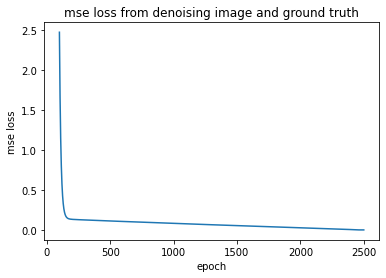

In [ ]:
plt.plot(range(100, train_iter + 1), errors[100:])
plt.title('mse loss from denoising image and ground truth')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.show()

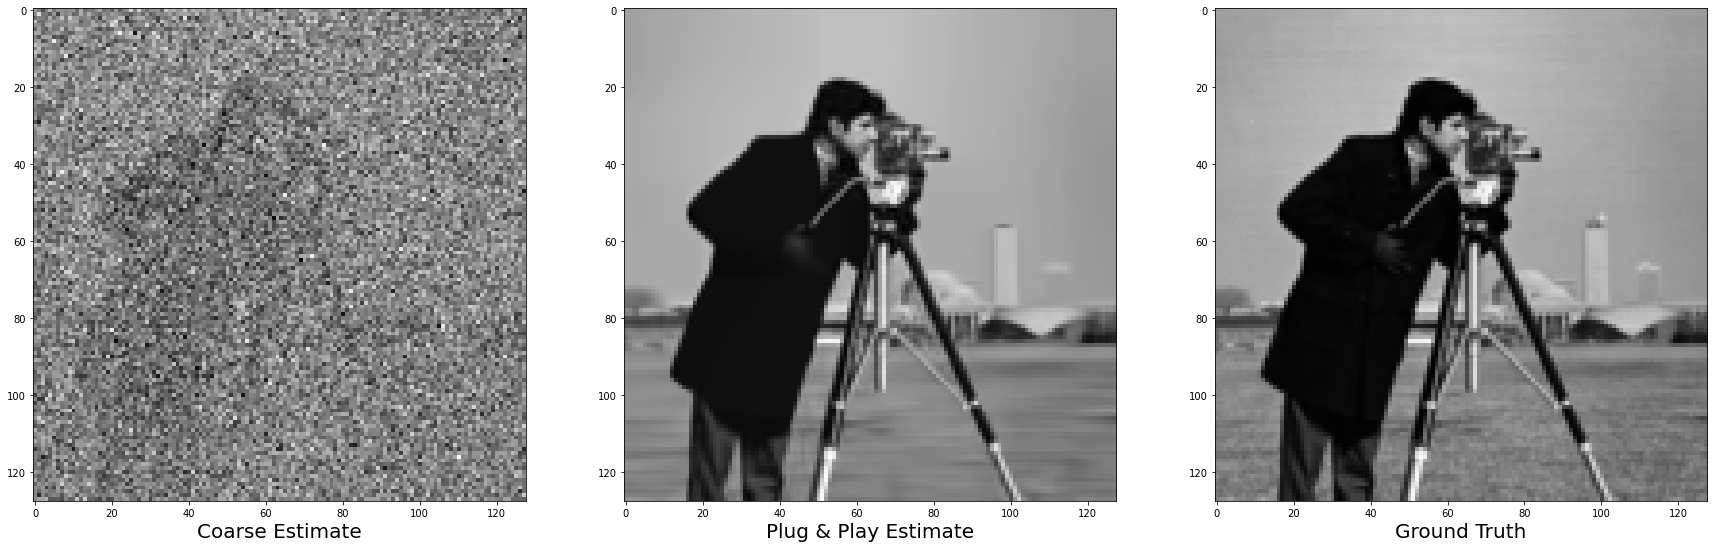

In [ ]:
x_pp = x_i   ###Enter your plug-and-play solution here so it can be displayed

fig = plt.figure(figsize=(30, 30))

#Coarse Estimate (A.T@y)
fig.add_subplot(1, 3, 1)
plt.imshow(AT(y), cmap='gray')
plt.xlabel('Coarse Estimate', fontsize=20)

#Plug & Play estimate (BM3D)
fig.add_subplot(1, 3, 2)
plt.imshow(x_pp, cmap='gray')
plt.xlabel('Plug & Play Estimate', fontsize=20)

#Ground Truth
fig.add_subplot(1, 3, 3)
plt.imshow(x, cmap='gray')
plt.xlabel('Ground Truth', fontsize=20)

plt.show()

Advanced task:  Accelerated gradient descent could be used to speed up the convergence of the plug-and-play method. If you are interested, you could implement it and compare the convergence rates. 